# Baseline
> Conv model

In [1]:
from fastai.vision.all import *
from action_recognition.core import *
from action_recognition.models import *

In [2]:
set_seed(2021)

In [3]:
torch.cuda.set_device(0)
torch.cuda.get_device_name()

'RTX A6000'

In [4]:
data_path = Path.home()/'.fastai/data/UCF101-frames'

In [5]:
instances = get_instances(data_path)

## Params

In [6]:
seq_len = 20
step=5
image_size = 128
bs = 16
val_idxs = None

you could put this split on a text file:

In [7]:
dls = get_action_dataloaders(instances, bs=bs, image_size=image_size, seq_len=seq_len, step=step, val_idxs=val_idxs)

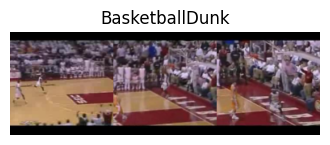

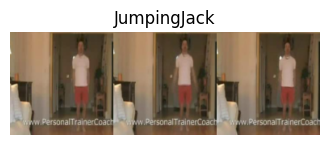

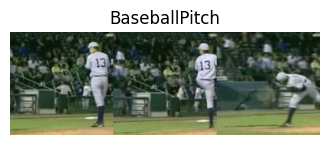

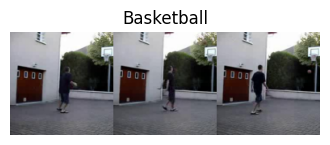

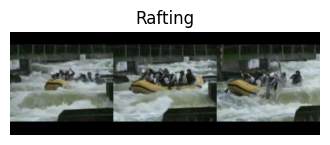

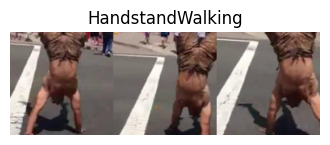

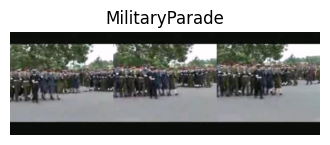

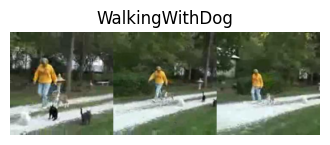

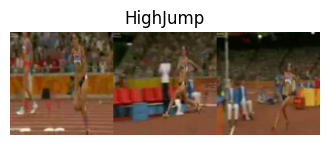

In [8]:
dls.show_batch()

## Train

In [9]:
model = SimpleModel(num_classes=dls.c, seq_len=seq_len)

/home/pmishra/.local/lib/python3.8/site-packages/fastai/vision/learner.py:295: UserWarning: `create_cnn_model` has been renamed to `create_vision_model` -- please update your code
  warn("`create_cnn_model` has been renamed to `create_vision_model` -- please update your code")


In [10]:
learn = Learner(dls, model, metrics=[accuracy, top_k_accuracy], wd=0.1, splitter=simple_splitter).to_fp16()
learn.freeze()

SuggestedLRs(valley=0.0004786300996784121)

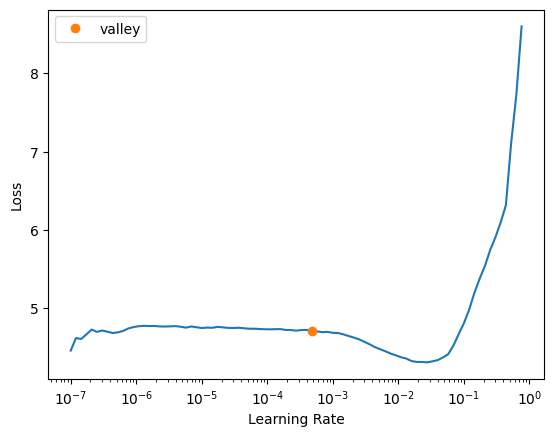

In [11]:
learn.lr_find()

In [12]:
learn.fit_one_cycle(10, 1e-3)

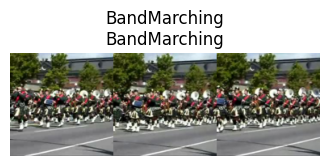

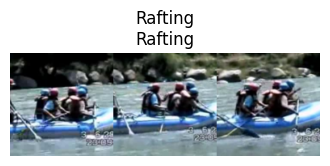

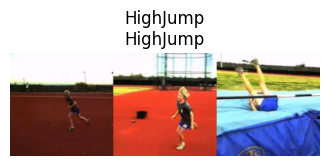

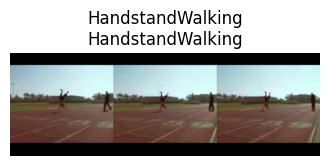

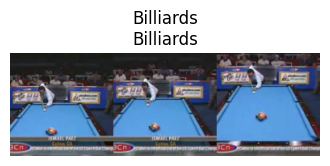

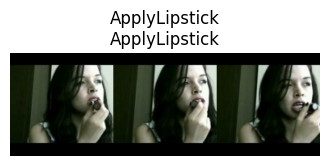

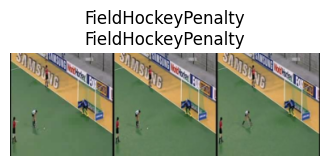

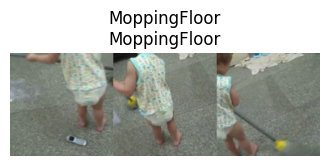

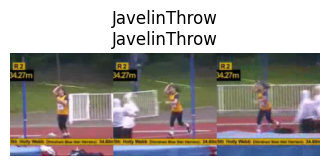

In [13]:
learn.show_results()

In [14]:
learn.validate()

(#3) [0.17763438820838928,0.9496996998786926,0.9906156063079834]